In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC, SVR
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA, NMF

In [4]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [15]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.972027972027972

In [16]:
param_grid = {'svc__C':np.logspace(-3, 2, 6), 'svc__gamma':np.logspace(-3, 2, 6)}
# pipeline을 이용한 GridSearchCV가 정보 누설 문제를 방지해줌
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)

In [17]:
grid.best_estimator_, grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

(Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC(gamma=1.0))]),
 {'svc__C': 1.0, 'svc__gamma': 1.0},
 0.9812311901504789,
 0.972027972027972)

In [19]:
pipe = make_pipeline(MinMaxScaler(), SVC())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.972027972027972

In [20]:
param_grid = {'svc__C':np.logspace(-3, 2, 6), 'svc__gamma':np.logspace(-3, 2, 6)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)

In [21]:
grid.best_estimator_, grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

(Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC(gamma=1.0))]),
 {'svc__C': 1.0, 'svc__gamma': 1.0},
 0.9812311901504789,
 0.972027972027972)

In [26]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
pipe.steps

[('standardscaler-1', StandardScaler()),
 ('pca', PCA(n_components=2)),
 ('standardscaler-2', StandardScaler())]

In [27]:
pipe.fit(cancer['data'])
components = pipe.named_steps['pca'].components_
components.shape

(2, 30)

In [36]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=4)

In [37]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [38]:
param_grid = {'logisticregression__C':np.logspace(-2, 3, 6)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [39]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.43570655, -0.34266946, -0.40809443, -0.5344574 , -0.14971847,
         0.61034122, -0.72634347, -0.78538827,  0.03886087,  0.27497198,
        -1.29780109,  0.04926005, -0.67336941, -0.93447426, -0.13939555,
         0.45032641, -0.13009864, -0.10144273,  0.43432027,  0.71596578,
        -1.09068862, -1.09463976, -0.85183755, -1.06406198, -0.74316099,
         0.07252425, -0.82323903, -0.65321239, -0.64379499, -0.42026013]])

In [43]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [46]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())
pipe.named_steps

{'standardscaler': StandardScaler(),
 'polynomialfeatures': PolynomialFeatures(),
 'ridge': Ridge()}

In [50]:
param_grid = {'polynomialfeatures__degree':[1, 2, 3], 'ridge__alpha':np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

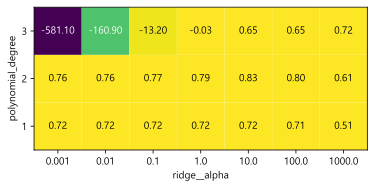

In [51]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
xlabel='ridge__alpha', ylabel='polynomial_degree', xticklabels=param_grid['ridge__alpha'], yticklabels=param_grid['polynomialfeatures__degree'])

In [52]:
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0},
 0.8287261407694739,
 0.7683045464100137)

In [58]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [59]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [60]:
param_grid = [
    {'classifier':[SVC()], 'preprocessing':[StandardScaler()], 'classifier__gamma':np.logspace(-3, 3, 7), 'classifier__C':np.logspace(-3, 3, 7)},
    {'classifier':[RandomForestClassifier()], 'preprocessing':[None], 'classifier__max_features':[1, 2, 3]}
]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid=[{'classifier': [SVC(C=10.0, gamma=0.01)],
                          'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'classifier__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'preprocessing': [StandardScaler()]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [61]:
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'classifier': SVC(C=10.0, gamma=0.01),
  'classifier__C': 10.0,
  'classifier__gamma': 0.01,
  'preprocessing': StandardScaler()},
 0.9858823529411765,
 0.9790209790209791)